In [71]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import os
import seaborn as sns
from collections import Counter

In [144]:
seen

['Desmodus_rotundusRel',
 'Loxodonta_africanaRel',
 'Odobenus_rosmarus',
 'Orcinus_orca',
 'Odobenus_rosmarusRel',
 'Orcinus_orcaRel',
 'Dasypus_novemcinctus',
 'Acomys_cahirinusRel',
 'Dasypus_novemcinctusRel',
 'Heterocephalus_glaber',
 'Myotis_brandtii',
 'Heterocephalus_glaberRel',
 'Homo_sapiensRel',
 'Nannospalax_galiliRel',
 'Desmodus_rotundus']

In [151]:
bl = {"Nannospalax_galiliRel":0.0790, "Homo_sapiensRel":0.00451, "Heterocephalus_glaberRel":0.0526, "Heterocephalus_glaber":0.0188, "Dasypus_novemcinctusRel":0.0188, "Orcinus_orcaRel":0.0422, "Odobenus_rosmarusRel":0.0158, "Odobenus_rosmarus":0.02546, "Desmodus_rotundus":0.0272, "Orcinus_orca":0.033251, "Dasypus_novemcinctus":0.0421, "Acomys_cahirinusRel":0.0899, "Myotis_brandtii":0.0152}
leaves = {"Nannospalax_galiliRel":18, "Homo_sapiensRel":2, "Heterocephalus_glaberRel":2, "Heterocephalus_glaber":2, "Dasypus_novemcinctusRel":4, "Orcinus_orcaRel":22, "Odobenus_rosmarusRel":5, "Odobenus_rosmarus":5, "Desmodus_rotundus":30, "Orcinus_orca":16, "Dasypus_novemcinctus":3, "Acomys_cahirinusRel":2, "Myotis_brandtii":4}


C:\Users\astar\AppData\Local\Temp\ipykernel_21808\350983610.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\350983610.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\350983610.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

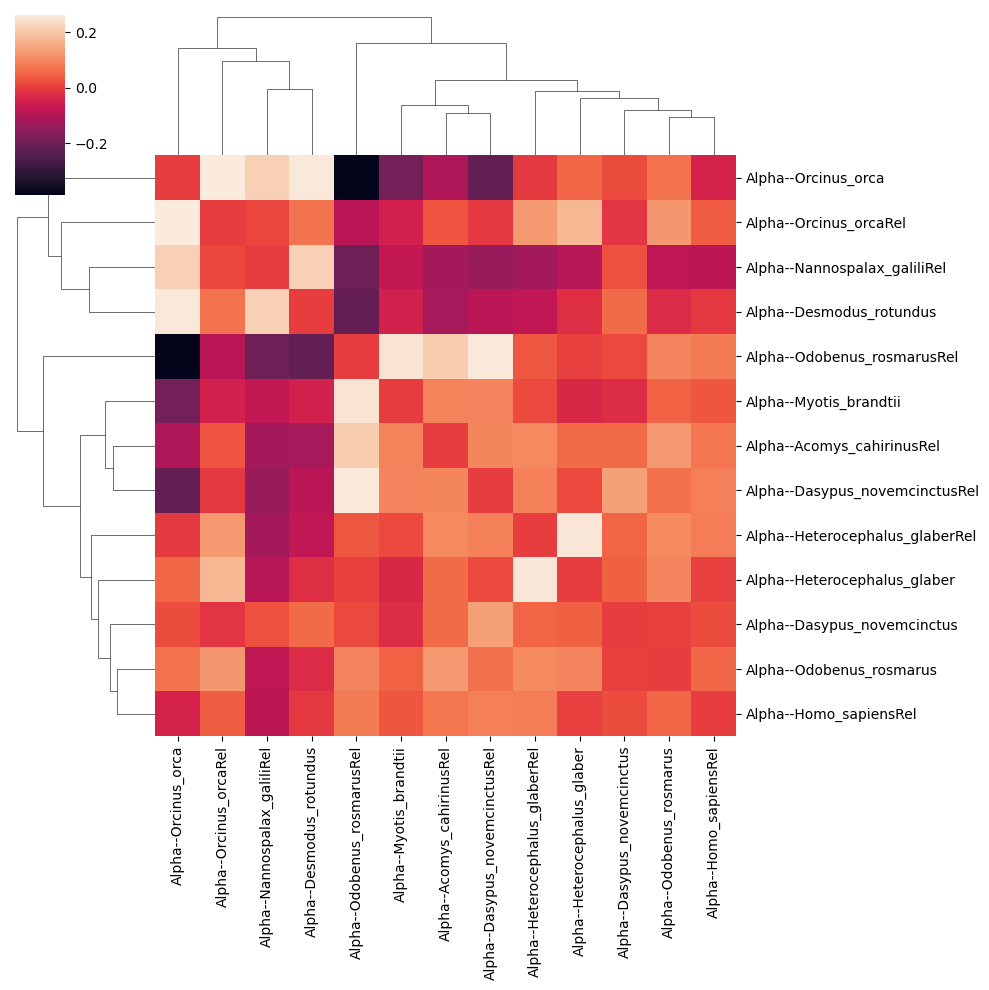

In [166]:
df = pd.DataFrame()
ind = 1
#seen = ["Desmodus_rotundusRel", "Loxodonta_africanaRel", "Desmodus_rotundus", "Homo_sapiensRel"]
seen = ["Desmodus_rotundusRel", "Loxodonta_africanaRel"]
for folder in os.listdir("FWC_PWC_New"):
    if "Rel" in folder:
        suffix = "Rel"
    else:
        suffix = ""
    for file in os.listdir("FWC_PWC_New/" + folder):
        if "NC_GOBP_" in file and "_".join(file.split("_")[2:4]) + suffix not in seen:
            seen.append("_".join(file.split("_")[2:4]) + suffix)
            v = pd.read_csv("FWC_PWC_New/" + folder + "/" + file).set_index("Term")
            v = v[(v["Number FWC Sites"] > 500) | (v["Number PWC Sites"] > 500)]
            v["Med Dif"] = v["Median PhyloP FWC"] - v["Median PhyloP PWC"]
            v = v[["MWU p-value Corrected Quant", "Alpha", "Med Dif"]].copy()
            v.columns = [x + "--" + "_".join(file.split("_")[2:4]) + suffix for x in v.columns]
            if ind:
                df = v.copy()
                ind = 0
            else:
                df = df.join(v, how = "outer")

dff = df.dropna()

alphas = []
ps = []
meds = []
for i in dff.columns:
    if "Alpha" in i:
        alphas.append(i)
    elif "Med" in i:
        meds.append(i)
    else:
        ps.append(i)
        
for i, j in zip(ps, alphas):
    dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])

logs = []
for i in dff.columns:
    if i.startswith("L_"):
        logs.append(i)
sns.clustermap(dff[alphas].corr().replace(1, 0))

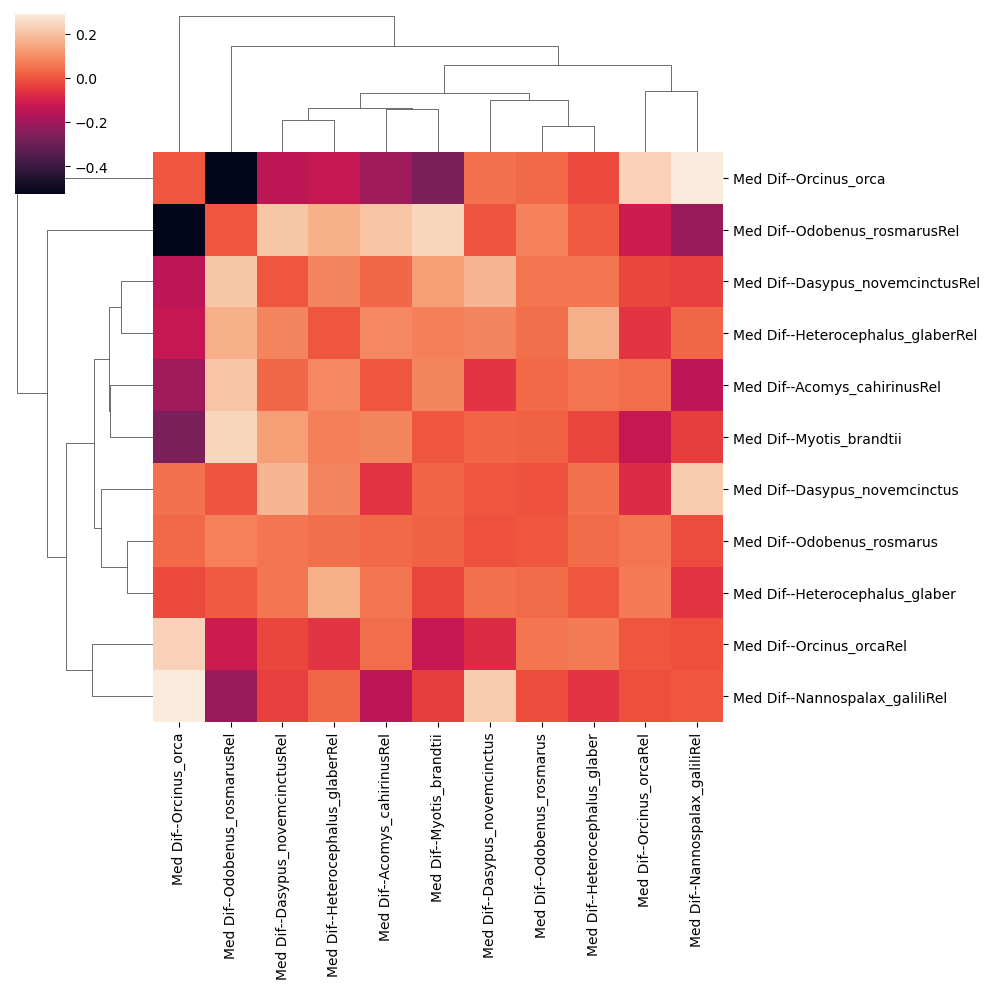

In [149]:

sns.clustermap(dff[meds].corr().replace(1, 0))

<Axes: xlabel='Med Dif--Orcinus_orca', ylabel='Med Dif--Odobenus_rosmarusRel'>

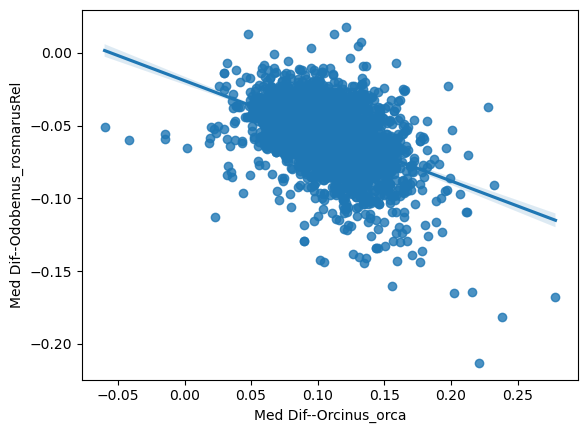

In [167]:
dff[["Med Dif--Orcinus_orca", "Med Dif--Odobenus_rosmarusRel"]]
sns.regplot(x=dff["Med Dif--Orcinus_orca"], y=dff["Med Dif--Odobenus_rosmarusRel"])

In [168]:

order = [x.split("--")[1] for x in meds]

ordered = []
for o in order:
    ordered.append(leaves[o])

out = []
for index, row in dff.iterrows():
    out.append([index, pearsonr(ordered, row[logs])[0], pearsonr(ordered, row[logs])[1], pearsonr(ordered, row[meds])[0], pearsonr(ordered, row[meds])[1]])

In [169]:
vv.sort_values(1)

,0,1,2,3,4
18,DNA Metabolic Process (GO:0006259),-0.411749,0.162131,0.737191,0.004037
17,DNA Damage Response (GO:0006974),-0.376113,0.205300,0.719850,0.005529
19,DNA Repair (GO:0006281),-0.316411,0.292224,0.743696,0.003566
36,Negative Regulation Of Gene Expression (GO:001...,-0.294787,0.328206,0.654650,0.015180
59,Positive Regulation Of Cytokine Production (GO...,-0.292487,0.332171,0.682327,0.010184
...,...,...,...,...,...
70,Positive Regulation Of Phosphorylation (GO:004...,0.631812,0.020531,0.754755,0.002863
65,Positive Regulation Of Intracellular Signal Tr...,0.656255,0.014848,0.758632,0.002645
108,Supramolecular Fiber Organization (GO:0097435),0.668997,0.012403,0.772293,0.001975
106,Regulation Of Protein Phosphorylation (GO:0001...,0.703726,0.007267,0.735951,0.004132


In [159]:
vv = pd.DataFrame(out)
vv = vv.sort_values(1)
vv.to_csv("Bleh3.csv")

<Axes: xlabel='Synapse Organization (GO:0050808)'>

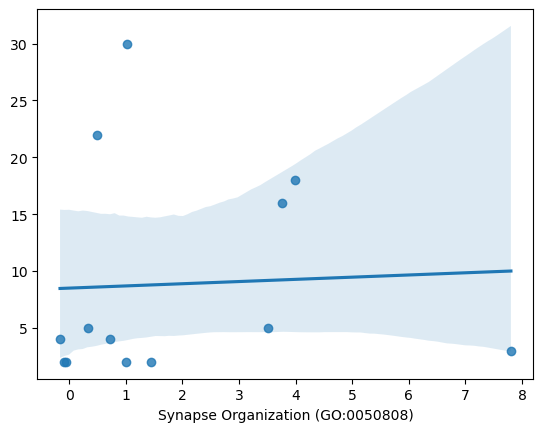

In [163]:
sns.regplot(x = row[logs], y = ordered)

In [164]:
row

MWU p-value Corrected Quant--Odobenus_rosmarus             3.079445e-04
Alpha--Odobenus_rosmarus                                   2.429762e-01
Med Dif--Odobenus_rosmarus                                 3.350000e-01
MWU p-value Corrected Quant--Orcinus_orca                  1.751008e-04
Alpha--Orcinus_orca                                        2.320229e-01
Med Dif--Orcinus_orca                                      9.790000e-01
MWU p-value Corrected Quant--Odobenus_rosmarusRel          4.697326e-01
Alpha--Odobenus_rosmarusRel                                4.040777e-02
Med Dif--Odobenus_rosmarusRel                             -1.620000e-01
MWU p-value Corrected Quant--Orcinus_orcaRel               3.259392e-01
Alpha--Orcinus_orcaRel                                     3.104863e-02
Med Dif--Orcinus_orcaRel                                   8.000000e-02
MWU p-value Corrected Quant--Dasypus_novemcinctus          1.566853e-08
Alpha--Dasypus_novemcinctus                                2.523

<Axes: xlabel='Synapse Organization (GO:0050808)'>

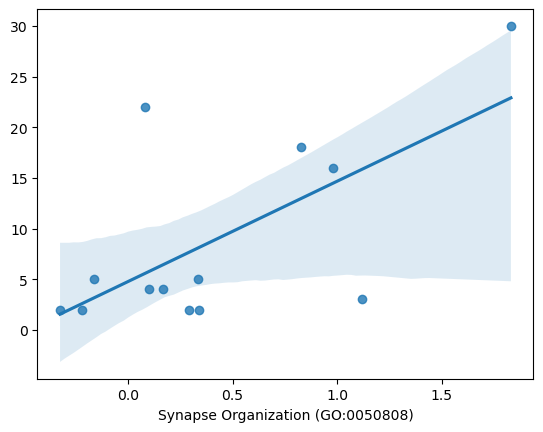

In [162]:
row = dff.loc["Synapse Organization (GO:0050808)"]
sns.regplot(x = row[meds], y = ordered)

In [108]:
df["NaN_Num"] = df.isna().sum(axis=1)/2
dff = df[df["NaN_Num"] < 3]
dff = df.dropna()
alphas = []
ps = []
for i in dff.columns:
    if "Alpha" in i:
        alphas.append(i)
    else:
        ps.append(i)
        
for i, j in zip(ps, alphas):
    dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])

logs = []
for i in dff.columns:
    if i.startswith("L_"):
        logs.append(i)

C:\Users\astar\AppData\Local\Temp\ipykernel_21808\1018691020.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\1018691020.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\1018691020.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [98]:

dff["Median alpha"] = np.median(dff[alphas].replace(np.nan, 0), axis = 1)
dff.sort_values("Median alpha").to_csv("Bleh2.csv")

dff["Median L"] = np.median(dff[logs].replace(np.nan, 0), axis = 1)
dff.sort_values("Median L").to_csv("Bleh4.csv")

C:\Users\astar\AppData\Local\Temp\ipykernel_21808\706266344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Median alpha"] = np.median(dff[alphas].replace(np.nan, 0), axis = 1)
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\706266344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Median L"] = np.median(dff[logs].replace(np.nan, 0), axis = 1)


In [53]:
df = pd.DataFrame()
ind = 1
exclude = ["NC_PerGene_Homo_sapiens_MaxLifespan.FWC_PWC.Prelim.Rel.csv", "NC_PerGene_Desmodus_rotundus_VocalLearning.FWC_PWC.Prelim.csv"]
exclude = []
for file in os.listdir("FWC_PWC"):
    if "." in file and file not in exclude and "NC_GOBP" in file:
        v = pd.read_csv("FWC_PWC/" + file).set_index("Term")
        v = v[["MWU p-value Corrected Quant", "Alpha"]].copy()
        v.columns = [x + " " + file.replace("FWC_PWC.Prelim.", "").replace(".csv", "").replace("NC_PerGene_", "") for x in v.columns]
        if ind:
            df = v.copy()
            ind = 0
        else:
            df = df.join(v, how = "outer")
df

,MWU p-value Corrected Quant NC_GOBP_Heterocephalus_glaber_MaxLifespanHetFuk.Rel,Alpha NC_GOBP_Heterocephalus_glaber_MaxLifespanHetFuk.Rel,MWU p-value Corrected Quant NC_GOBP_Homo_sapiens_MaxLifespan.Rel,Alpha NC_GOBP_Homo_sapiens_MaxLifespan.Rel,MWU p-value Corrected Quant NC_GOBP_Nannospalax_galili_MaxLifespan.Rel,Alpha NC_GOBP_Nannospalax_galili_MaxLifespan.Rel
Term,,,,,,
'De Novo' AMP Biosynthetic Process (GO:0044208),0.089051,0.085946,0.358679,0.002969,0.927917,-0.120911
'De Novo' Post-Translational Protein Folding (GO:0051084),0.076266,0.025695,0.408826,0.019343,0.865369,-0.030851
2-Oxoglutarate Metabolic Process (GO:0006103),0.019717,0.068040,0.122547,0.082134,0.129925,0.019253
3'-Phosphoadenosine 5'-Phosphosulfate Metabolic Process (GO:0050427),0.015441,0.054556,0.198072,0.071235,0.989030,-0.079989
3'-UTR-mediated mRNA Destabilization (GO:0061158),0.168583,0.018840,0.489668,0.059074,0.554926,-0.003211
...,...,...,...,...,...,...
tRNA Transcription (GO:0009304),0.112189,0.042992,0.670006,-0.006352,0.364912,0.054006
tRNA Transcription By RNA Polymerase III (GO:0042797),0.206822,0.151734,0.322337,0.055331,0.316315,0.107912
tRNA Transport (GO:0051031),0.609442,-0.010340,0.663815,0.118147,0.690843,-0.115874


In [52]:
dff["Median alpha"] = np.median(dff[alphas], axis = 1)
#dff.sort_values("Median alpha").to_csv("Bleh2.csv")

dff["Median L"] = np.median(dff[logs], axis = 1)
dff.sort_values("Median L").to_csv("Bleh4.csv")

C:\Users\astar\AppData\Local\Temp\ipykernel_21808\1008802959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Median alpha"] = np.median(dff[alphas], axis = 1)
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\1008802959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Median L"] = np.median(dff[logs], axis = 1)


C:\Users\astar\AppData\Local\Temp\ipykernel_21808\4085020014.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\4085020014.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])
C:\Users\astar\AppData\Local\Temp\ipykernel_21808\4085020014.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

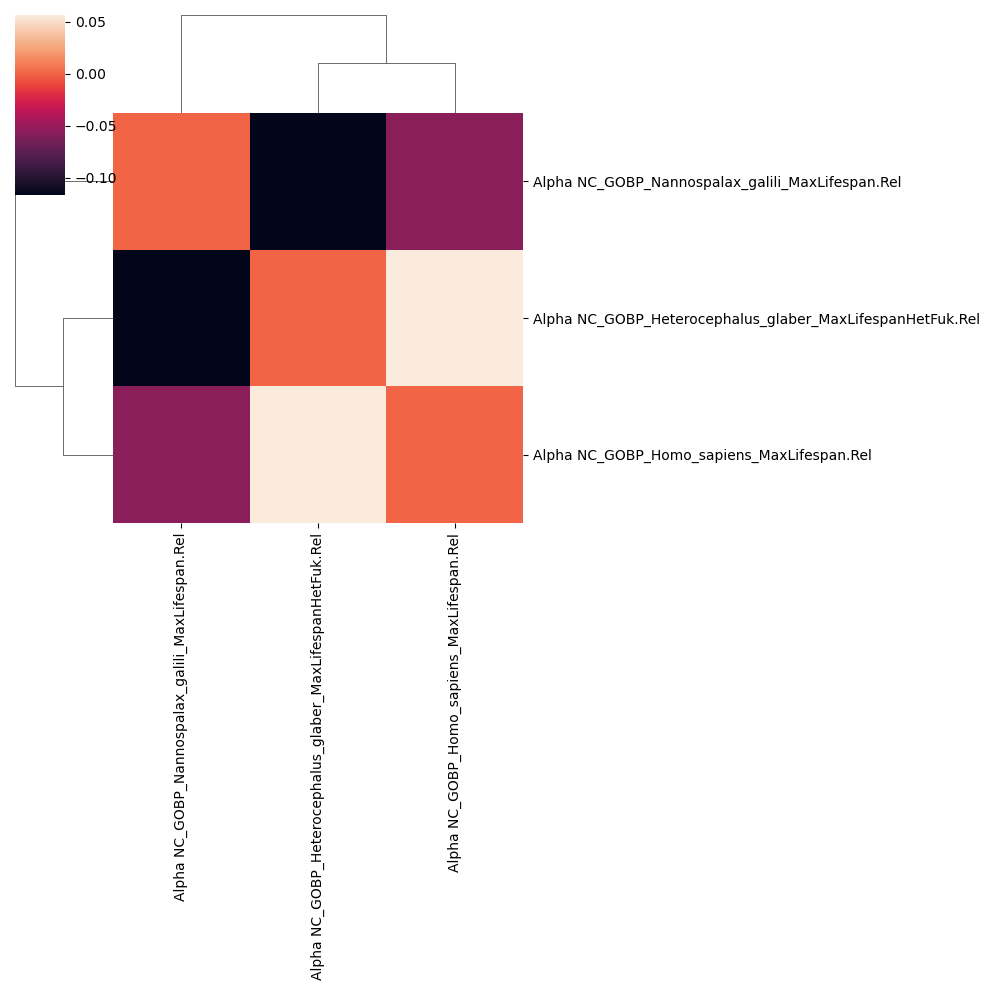

In [55]:
dff = df.dropna()

alphas = []
ps = []
for i in dff.columns:
    if "Alpha" in i:
        alphas.append(i)
    else:
        ps.append(i)
        
for i, j in zip(ps, alphas):
    dff["L_" + i] = -np.log10(dff[i])*np.sign(dff[j])

logs = []
for i in dff.columns:
    if i.startswith("L_"):
        logs.append(i)
sns.clustermap(dff[alphas].corr().replace(1, 0))

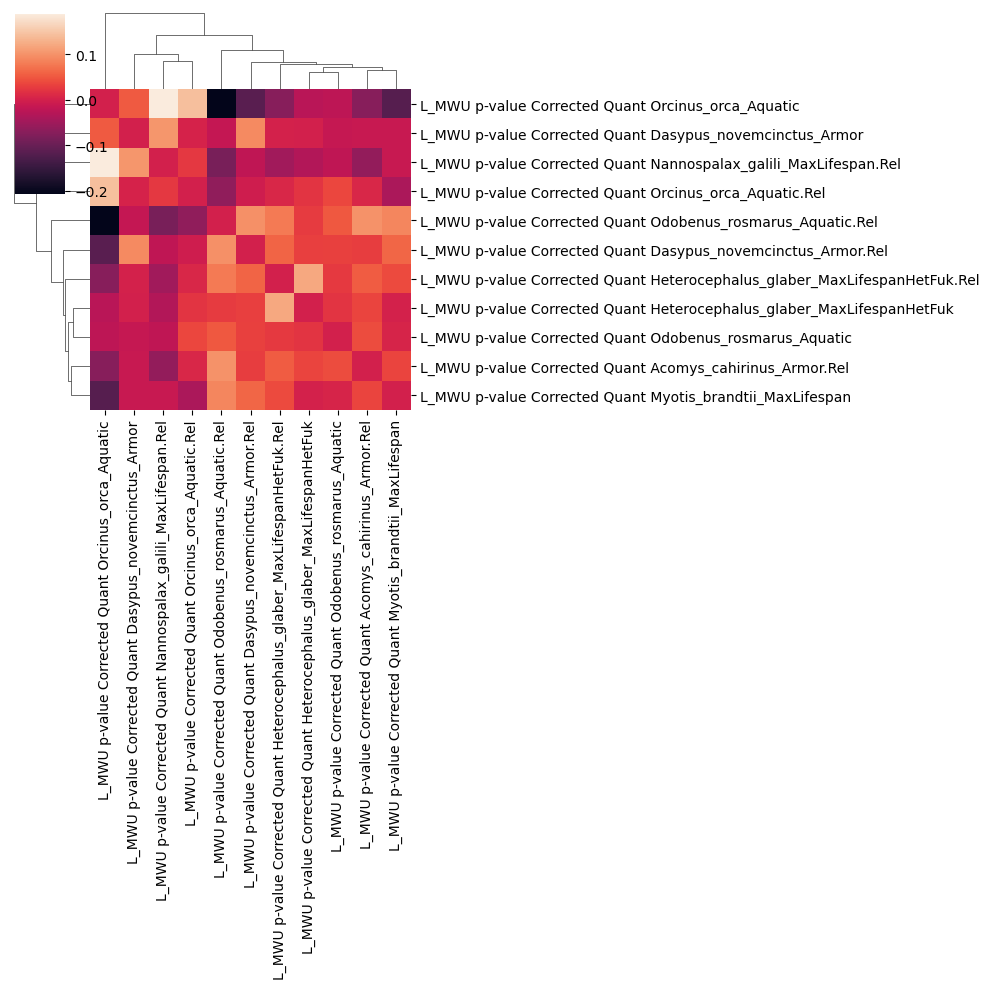

In [46]:
sns.clustermap(dff[logs].corr().replace(1, 0))

In [6]:
v = pd.read_csv("NC_PerGene_Orcinus_orca_Aquatic.FWC_PWC.Prelim (4).csv").set_index("Term")
v.columns = [x + " Cow" for x in v.columns]

vv = pd.read_csv("NC_PerGene_Orcinus_orca_Aquatic.FWC_PWC.Prelim (3).csv").set_index("Term")
vv.columns = [x + " Orca" for x in vv.columns]

v = v.join(vv).dropna()
v

,Median PhyloP FWC Cow,Number FWC Sites Cow,Median PhyloP PWC Cow,Number PWC Sites Cow,MWU p-value Corrected Quant Cow,Fisher exact p-value Corrected Quant Cow,Alpha Cow,Cutoff used Cow,Cutoffs Cow,Tag Cow,...,MWU p-value Corrected Quant Orca,Fisher exact p-value Corrected Quant Orca,Alpha Orca,Cutoff used Orca,Cutoffs Orca,Tag Orca,Table Orca,MWU FDR Orca,Prop FWC PerTerm/Prop FWC Genome-Wide Orca,Binomial p-value FWC vs PWC Orca
Term,,,,,,,,,,,,,,,,,,,,,
ATP2B4,0.2560,1317,0.0645,5506,5.154818e-12,5.343806e-11,0.333961,0.380806,"[0.38080611222444816, 14.047550000000001]","dc > 0.1, likely stable",...,0.000005,0.000204,0.251228,0.292239,"[0.29223927855711374, 4.806252404809618, 5.363...","dc > 0.1, likely stable","[[529, 556], [597, 838]]",0.001372,0.985531,5.336155e-01
ZFP64,0.0090,4843,-0.0720,22760,1.050279e-10,6.151924e-10,0.175744,-0.070416,"[4.879490180360719, 5.016987575150299, 6.94195...","dc > 0.1, likely stable",...,0.001884,0.001003,0.112722,0.194472,"[0.1944717434869716, 3.505583266533062, 4.0708...","dc > 0.1, likely stable","[[2028, 2884], [2540, 4071]]",0.074706,0.975740,2.194007e-02
ADORA1,0.2760,496,0.0020,1725,1.027476e-09,1.030302e-07,0.416375,0.259206,"[0.2592059118236474, 7.233211923847698, 8.5830...","dc > 0.1, likely stable",...,0.010235,0.002603,0.335948,0.540244,"[0.5402444889779581, 7.368306112224456, 13.5685]","dc > 0.1, likely stable","[[137, 223], [164, 402]]",0.199656,0.889882,3.180979e-03
FMOD,0.2635,606,0.0650,2290,5.393149e-09,3.288842e-08,0.393882,0.130803,"[0.13080310621242575, 4.609188476953909, 6.067...","dc > 0.1, likely stable",...,0.011448,0.010217,0.250033,0.347182,"[0.34718156312625226, 2.686214729458918, 3.831...","dc > 0.1, likely stable","[[214, 284], [243, 430]]",0.211720,0.973450,4.265780e-01
CDH17,0.1320,1740,0.0300,3439,1.134781e-08,4.893288e-07,0.253407,0.011287,"[5.130699398797596, 11.734000000000002]","dc > 0.1, likely stable",...,0.722315,0.358478,0.045461,0.918894,"[0.9188938877755568, 1.5620809619238507, 2.562...","dc > 0.1, likely stable","[[167, 871], [222, 1213]]",1.000000,0.960759,8.859259e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADGRL3,-0.0520,12875,-0.0150,40355,1.000000e+00,1.000000e+00,-0.137348,-0.013326,"[3.433894989979965, 4.947309018036076, 15.9616]","dc > 0.1, likely stable",...,1.000000,1.000000,-0.157829,0.019715,"[2.072517034068138, 2.4972346693386775, 2.9927...","dc > 0.1, likely stable","[[5358, 6186], [5976, 5959]]",1.000000,1.125428,8.086928e-64
SDCBP,0.0200,23564,0.0500,70762,1.000000e+00,1.000000e+00,-0.115366,0.021188,"[7.180206513026054, 7.769772745490986, 7.93822...","dc > 0.1, likely stable",...,1.000000,1.000000,-0.112430,0.021378,"[2.8243706412825667, 6.391816132264534, 7.7508...","dc > 0.1, likely stable","[[10919, 10072], [13232, 10972]]",1.000000,1.063124,4.335216e-32
PCDH9,-0.0320,10046,0.0050,34292,1.000000e+00,1.000000e+00,-0.145366,-0.063202,"[0.27369038076152563, 16.023400000000002]","dc > 0.1, likely stable",...,1.000000,1.000000,-0.180157,0.021378,"[1.890039679358722, 2.4846139278557153, 3.6737...","dc > 0.1, likely stable","[[4324, 4768], [6017, 5622]]",1.000000,1.003876,6.240743e-01


In [22]:
x = ["key", "np.median(v2[stat_print])", "v2.shape[0]", "np.median(vv2[stat_print])", "vv2.shape[0]", 'mwu(v2[stat_test], vv2[stat_test], alternative = "greater")[1]', '(fpg1[1] + fpg2[2])/2',\
                    'mwu(v2[stat_test], vv2[stat_test])[1]', '(fp1[1] + fp2[2])/2', 'alpha[0]', 'alpha[1]', 'table1', 'table2', 'cuttt']
len(x)

14

In [24]:
stat_test = " "
stat_print = " "
z = ["Term", "Median " + stat_print + " FWC", "Number FWC Sites", "Median " + stat_print + " PWC", "Number PWC Sites", "MWU p-value " + stat_test, "Fisher exact p-value " + stat_test, "MWU p-value; two-sided " + stat_test, "Fisher exact p-value; two-sided " + stat_test, "Alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"]
len(z)

14

In [15]:
print(pearsonr(v["Alpha Cow"], v["Alpha Orca"]))

PearsonRResult(statistic=0.2591335830492604, pvalue=1.7841706702502764e-49)


In [17]:
print(pearsonr(v["Prop FWC PerTerm/Prop FWC Genome-Wide Cow"], v["Prop FWC PerTerm/Prop FWC Genome-Wide Orca"]))

PearsonRResult(statistic=0.22600714490294865, pvalue=9.530014794201172e-38)


In [18]:
print(pearsonr(v["Prop FWC PerTerm/Prop FWC Genome-Wide Cow"], v["Alpha Cow"]))

PearsonRResult(statistic=-0.03965073667553317, pvalue=0.026102944163102593)


In [19]:
print(pearsonr(v["Prop FWC PerTerm/Prop FWC Genome-Wide Orca"], v["Alpha Orca"]))

PearsonRResult(statistic=-0.341608899297427, pvalue=7.0681215736225294e-87)


In [21]:
v.sort_values("Prop FWC PerTerm/Prop FWC Genome-Wide Orca")

,Median PhyloP FWC Cow,Number FWC Sites Cow,Median PhyloP PWC Cow,Number PWC Sites Cow,MWU p-value Corrected Quant Cow,Fisher exact p-value Corrected Quant Cow,Alpha Cow,Cutoff used Cow,Cutoffs Cow,Tag Cow,...,MWU p-value Corrected Quant Orca,Fisher exact p-value Corrected Quant Orca,Alpha Orca,Cutoff used Orca,Cutoffs Orca,Tag Orca,Table Orca,MWU FDR Orca,Prop FWC PerTerm/Prop FWC Genome-Wide Orca,Binomial p-value FWC vs PWC Orca
Term,,,,,,,,,,,,,,,,,,,,,
DPF3,0.1510,2136,0.1510,7418,0.445581,0.030614,0.135495,1.570007,"[1.5700070140280555, 9.04409639278557, 14.1427]","dc > 0.1, likely stable",...,1.000000,1.000000,-0.427269,0.404233,"[7.353141583166334, 7.692112725450901, 14.3020...","dc > 0.1, likely stable","[[832, 1152], [4350, 4220]]",1.000000,0.430294,4.940656e-324
ADCY5,0.0630,1369,0.0660,4724,0.847207,0.618767,-0.020632,0.867996,"[0.8679960921843701, 1.11572244488978, 2.43692...","dc > 0.1, likely stable",...,1.000000,0.999978,-0.291539,0.199365,"[9.094749899799595, 15.307400000000001]","dc > 0.1, likely stable","[[582, 676], [2662, 2394]]",1.000000,0.456055,0.000000e+00
CNTNAP4,0.0245,1068,0.0010,4101,0.249485,0.016327,0.181191,0.895695,"[0.8956953907815617, 5.234208416833663, 13.1365]","dc > 0.1, likely stable",...,0.999999,0.999761,-0.271887,0.095497,"[4.982646893787578, 5.227004408817638, 14.8384]","dc > 0.1, likely stable","[[493, 557], [2077, 1845]]",1.000000,0.483392,8.506490e-245
TNR,0.0755,3368,0.0520,11260,0.282112,0.083714,0.057244,0.435667,"[0.43566733466933627, 2.2037915831663284, 3.29...","dc > 0.1, likely stable",...,1.000000,1.000000,-0.377021,0.202307,"[0.31695280561122274, 9.20199388777555, 14.361...","dc > 0.1, likely stable","[[1380, 1750], [5083, 4681]]",1.000000,0.555645,4.940656e-324
LYST,0.1110,1147,0.0950,3979,0.300555,0.050730,0.139798,0.983686,"[0.9836861723446901, 5.427860621242484, 9.9742]","dc > 0.1, likely stable",...,1.000000,1.000000,-0.451312,0.259624,"[0.3776239478957937, 14.4786]","dc > 0.1, likely stable","[[491, 705], [1689, 1671]]",1.000000,0.600881,3.266239e-131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DST,0.1615,3358,0.1250,11304,0.003973,0.032559,0.071034,0.067543,"[3.1289361723446873, 3.30555501002004, 5.01287...","dc > 0.1, likely stable",...,0.127217,0.219475,0.044448,0.645214,"[0.6452140280561096, 5.10006523046092, 5.99103...","dc > 0.1, likely stable","[[907, 2287], [825, 2177]]",0.623511,1.179953,2.311176e-35
TMEM47,0.2140,2394,0.2290,6338,0.993414,0.699291,-0.024199,0.205986,"[4.990668136272543, 6.585562024048091, 8.68410...","dc > 0.1, likely stable",...,0.996616,0.993734,-0.167840,0.288163,"[3.9274584168336624, 5.45088426853707, 8.58237...","dc > 0.1, likely stable","[[999, 1096], [1007, 946]]",1.000000,1.184635,7.864426e-25
PTPN13,0.1930,1743,0.1795,4830,0.526635,0.277591,0.033977,0.152337,"[1.2321183366733468, 2.7978016032064126, 4.255...","dc > 0.1, likely stable",...,0.630597,0.191739,0.088678,1.061233,"[1.0612327655310612, 3.18217384769539, 5.74497...","dc > 0.1, likely stable","[[259, 1141], [223, 1078]]",1.000000,1.186437,1.998481e-17
